<a href="https://colab.research.google.com/github/twinkleSojeong/StockAnalysisInPython/blob/master/MDD%EC%99%80_%EA%B8%B0%EC%98%A8_%EB%B3%80%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U finance-datareader

In [6]:
#라이브러리 설치
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#변수 정의
krx = fdr.StockListing('KRX')
sectors = dict(list(krx.groupby('Sector')))
stocks = fdr.StockListing("KRX")

# 가스회사 주가만 헤쳐모여

> 표준화는 모르겠고, 일단 주가 그래프 그려보자



In [9]:
#가스회사 정리
gas_company_list = [
    ["한국가스공사", "036460"],
    ["서울도시가스", "017390"],
    ["예스코", "015360"],
    ["삼천리", "004690"],
    ["인천도시가스", "034590"],
    ["경동도시가스", "267290"],
    ["대성에너지", "117580"],
    ["지에스이", "053050"],
]

In [51]:
#가스회사 주가 불러와서 표로 그리기
df_list = [fdr.DataReader(code, '2008-01-01', '2019-12-31')['Close']for name, code in gas_company_list]
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in gas_company_list]
df

,한국가스공사,서울도시가스,예스코,삼천리,인천도시가스,경동도시가스,대성에너지,지에스이
Date,,,,,,,,
2008-01-02,63027,85400,37000,196000,27206,NaN,NaN,2060
2008-01-03,65540,85900,36550,195000,27114,NaN,NaN,2010
2008-01-04,67667,85800,36700,194000,27388,NaN,NaN,2000
2008-01-07,67183,85500,37000,190500,26703,NaN,NaN,1940
2008-01-08,70567,85400,37000,190500,26794,NaN,NaN,1940
...,...,...,...,...,...,...,...,...
2019-12-23,38500,72800,38400,86000,29500,21350.0,5390.0,1460
2019-12-24,38550,71200,37950,86300,29850,21250.0,5380.0,1480
2019-12-26,38850,71300,37950,86500,29600,21550.0,5400.0,1475


In [68]:
#df_droping = df.dropna(axis=1)
#df_droping

# df[['경동도시가스', '대성에너지']].dropna(axis=1)

df.mean(skipna=True)

한국가스공사     49552.007752
서울도시가스     83162.571621
예스코        33350.842602
삼천리       117029.962926
인천도시가스     26209.047186
경동도시가스     28556.416409
대성에너지       5971.371622
지에스이        1813.774857
dtype: float64

In [16]:
#matplotlib 환경설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumSquareB.ttf'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [17]:
# 막대 그래프 글자 깨짐 해결

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

findfont: Font family ['NanumSquareB.ttf'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

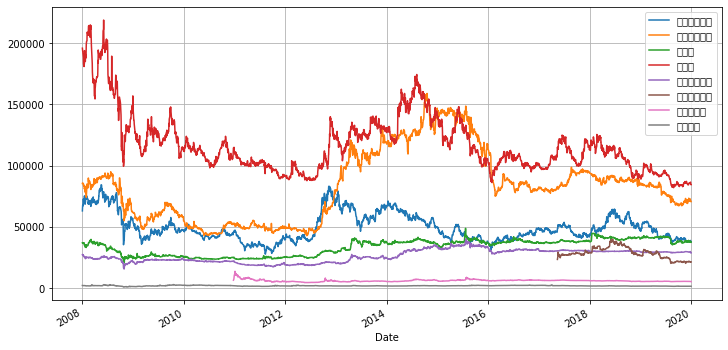

In [18]:
df.plot()

#결과는 나왔는데 글자가 깨진다.. 나눔고딕 설치 필요!

# 주가 표준화/정규화 시도

In [20]:
#라이브러리 설치
import numpy as np
from numpy import *

In [26]:
df_list = [fdr.DataReader(code, '2008-01-01', '2019-12-31')['Close']for name, code in gas_company_list]
len(df_list)

8

In [54]:
#zscore를 이용한 표준화
import scipy.stats as ss
data_ss = ss.zscore(df)
print(data_ss)

[[ 1.20292891  0.07785626  0.56648329 ...         nan         nan
   0.88952448]
 [ 1.42726747  0.09525486  0.49662676 ...         nan         nan
   0.70889214]
 [ 1.61714734  0.09177514  0.51991227 ...         nan         nan
   0.67276567]
 ...
 [-0.95538122 -0.41278436  0.71395819 ...         nan         nan
  -1.22387391]
 [-1.04018887 -0.40930464  0.61305431 ...         nan         nan
  -1.26000037]
 [-1.04465243 -0.4371424   0.62857799 ...         nan         nan
  -1.29612684]]


In [ ]:
data_ss = ss.zscore(df)

df.mean(skipna=True)

In [42]:
import pandas as pd

In [55]:
df_ss = pd.DataFrame(data_ss)
df_ss

,0,1,2,3,4,5,6,7
0,1.202929,0.077856,0.566483,3.254103,0.198048,NaN,NaN,0.889524
1,1.427267,0.095255,0.496627,3.212896,0.179772,NaN,NaN,0.708892
2,1.617147,0.091775,0.519912,3.171690,0.234203,NaN,NaN,0.672766
3,1.573940,0.081336,0.566483,3.027466,0.098125,NaN,NaN,0.456007
4,1.876034,0.077856,0.566483,3.027466,0.116203,NaN,NaN,0.456007
...,...,...,...,...,...,...,...,...
2962,-0.986626,-0.360589,0.783815,-1.278646,0.653759,NaN,NaN,-1.278064
2963,-0.982163,-0.416264,0.713958,-1.266284,0.723287,NaN,NaN,-1.205811
2964,-0.955381,-0.412784,0.713958,-1.258042,0.673624,NaN,NaN,-1.223874
2965,-1.040189,-0.409305,0.613054,-1.336335,0.494836,NaN,NaN,-1.260000


Null값을 제거하자

In [43]:
df_list1= pd.DataFrame(list,columns=gas_company_list)

ValueError: ignored

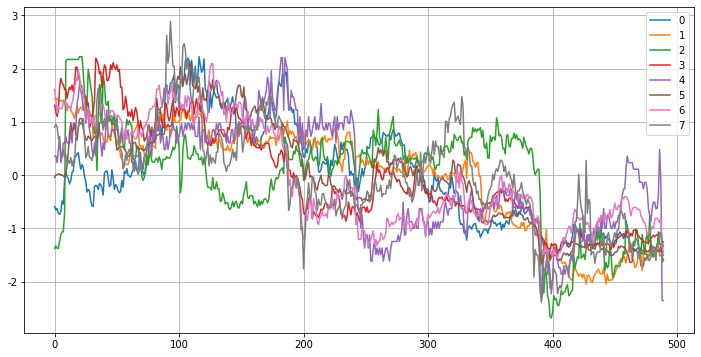

In [50]:
df_ss.plot()

In [59]:
df_dop_row = df_ss.dropna(axis=1)
df_dop_row

,0,1,2,3,4,7
0,1.202929,0.077856,0.566483,3.254103,0.198048,0.889524
1,1.427267,0.095255,0.496627,3.212896,0.179772,0.708892
2,1.617147,0.091775,0.519912,3.171690,0.234203,0.672766
3,1.573940,0.081336,0.566483,3.027466,0.098125,0.456007
4,1.876034,0.077856,0.566483,3.027466,0.116203,0.456007
...,...,...,...,...,...,...
2962,-0.986626,-0.360589,0.783815,-1.278646,0.653759,-1.278064
2963,-0.982163,-0.416264,0.713958,-1.266284,0.723287,-1.205811
2964,-0.955381,-0.412784,0.713958,-1.258042,0.673624,-1.223874
2965,-1.040189,-0.409305,0.613054,-1.336335,0.494836,-1.260000
